## Menelaah Data

Import library yang dibutuhkan

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
import missingno
import seaborn as sns

Membaca dataset yang ada

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

Melihat isi dari dataset 'train_data'

In [3]:
train_data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


Melihat informasi dataset 'train_data'

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Melihat isi dari dataset 'test_data'

In [5]:
test_data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


Melihat info dataset 'test_data'

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [7]:
train_data['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

Melihat distribusi kepuasan pelanggan

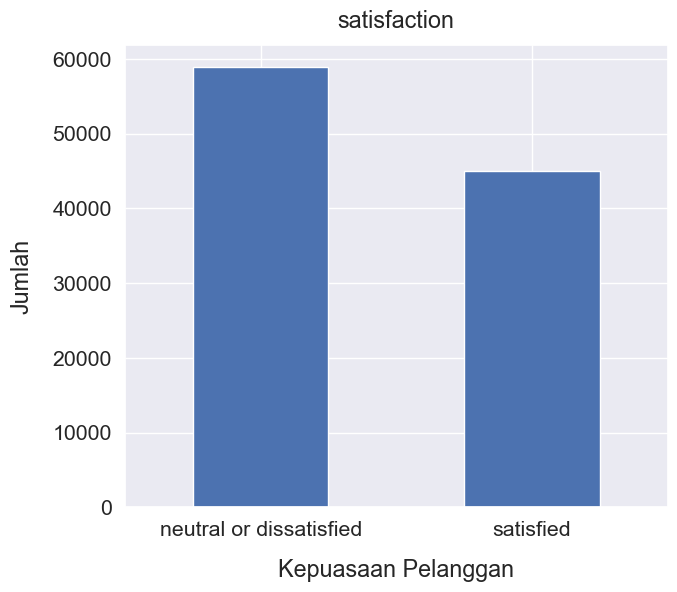

In [8]:
sns.set(font_scale=1.4)
train_data['satisfaction'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Kepuasaan Pelanggan", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("satisfaction", y=1.02);

Melihat distribusi data yang masih hilang/kosong

<Axes: >

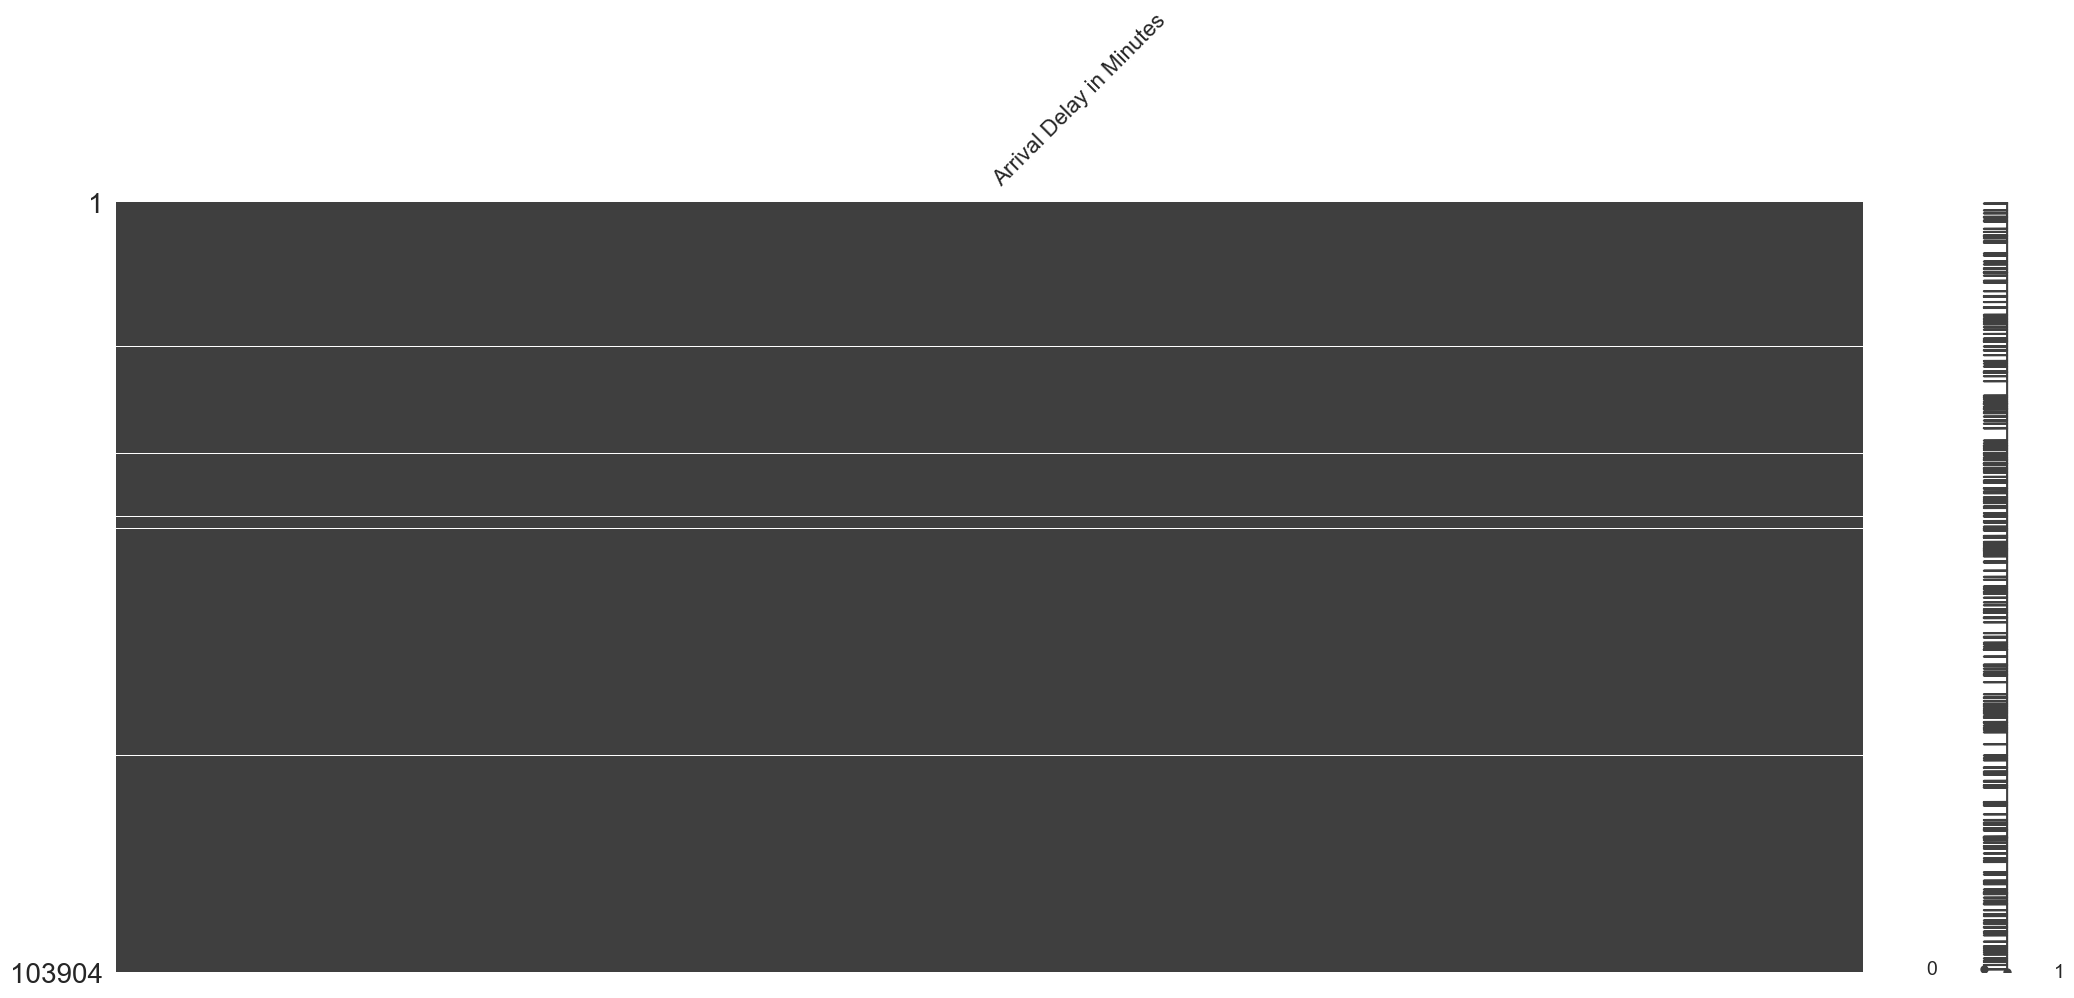

In [9]:
missingdata_df = train_data.columns[train_data.isnull().any()].tolist()
missingno.matrix(train_data[missingdata_df])

## Pre-Processing Data

Menghilangkan beberapa fitur yang tidak di gunakan dalam proses training data dan memisahkan fitur dan label pada data train

In [10]:
X_train = train_data.drop(['Unnamed: 0', 'id', 'satisfaction'], axis=1)
y_train = train_data['satisfaction']

Menghilangkan beberapa fitur yang tidak di gunakan dalam proses testing data dan memisahkan fitur dan label pada data test

In [11]:
X_test = test_data.drop(['Unnamed: 0', 'id', 'satisfaction'], axis=1)
y_test = test_data['satisfaction']

Melakukan encoding untuk fitur yang bertipe data kategorikal atau object

In [12]:
label_encoder = LabelEncoder()
for col in ['Gender', 'Customer Type', 'Type of Travel', 'Class']:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

Megisi nilai yang hilang pada fitur yang terdapat missing value

In [13]:
X_train['Arrival Delay in Minutes'].fillna(0, inplace=True)
X_test['Arrival Delay in Minutes'].fillna(0, inplace=True)

## Membuat Model dan Evaluasi

Inisialisasi pembuatan model Decision Tree dengan maksimal kedalaman 6

In [14]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth = 6)

Melatih model yang telah dibuat

In [15]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

Membuat prediksi pada data test

In [16]:
y_pred = dt_model.predict(X_test)

Evaluasi model dengan 3 fungsi yang disediakan modul sklearn.metrics, yaitu

accuracy_score, classification_report, dan confussion matrix

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9196181090237142
                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.92      0.93     14573
              satisfied       0.90      0.92      0.91     11403

               accuracy                           0.92     25976
              macro avg       0.92      0.92      0.92     25976
           weighted avg       0.92      0.92      0.92     25976



In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [19]:
print("|                 | Predicted Positive | Predicted Negative |")
print("|-----------------|--------------------|--------------------|")
print("| Actual Positive |         {}      |         {}       |".format(conf_matrix[0, 0], conf_matrix[0, 1]))
print("| Actual Negative |         {}        |         {}      |".format(conf_matrix[1, 0], conf_matrix[1, 1]))


|                 | Predicted Positive | Predicted Negative |
|-----------------|--------------------|--------------------|
| Actual Positive |         13344      |         1229       |
| Actual Negative |         859        |         10544      |


## Visualisasi Data

Visualisasi menggunakan fungsi plot_tree

In [20]:
from sklearn.tree import plot_tree

Pembuatan gambar visualisasi dan menyimpan nya menjadi file PNG

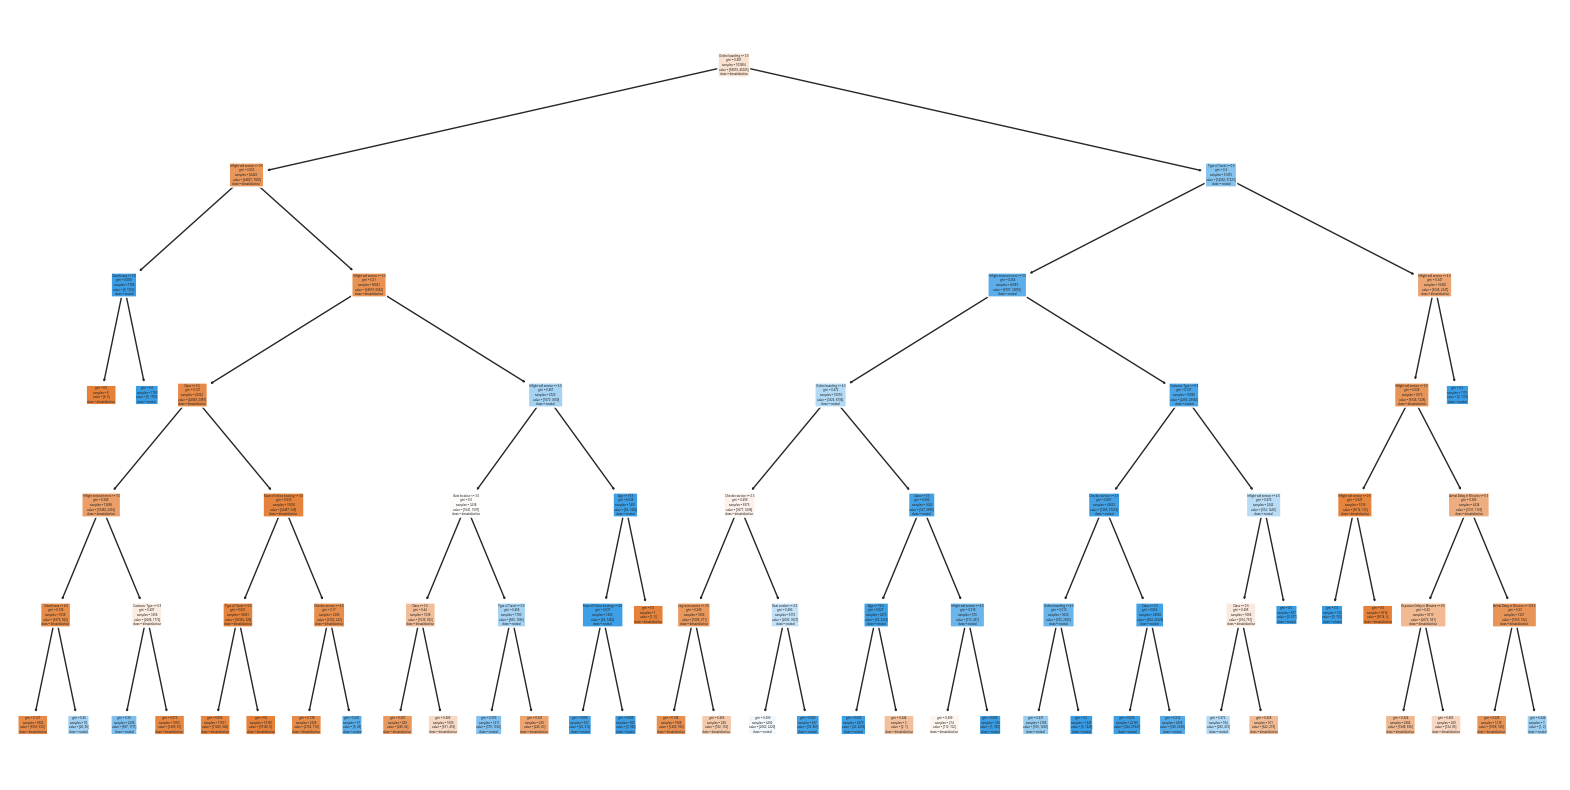

In [21]:
plt.figure(figsize=(20, 10))
feature_names = X_train.columns.tolist()
plot_tree(dt_model, feature_names=feature_names, class_names=['dissatisfaction', 'neutral', 'satisfaction'], 
          filled=True, rounded=True)

plt.savefig('decision_tree.png', dpi = 300)
plt.show()